In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
import numpy as np
df=pd.read_csv("C:\dataMining\\7.1_Motor_Vehicle_Accidents_during_1969_Month_wise.csv")
#Replacing the non-numerical values with NA(Data Cleaning)
df=df.replace(to_replace ="@",value ="NaN")
df=df.replace(to_replace ="*",value ="NaN")
#Dropping rows and columns having excess NA's(Data Reductiion)
df=df.dropna(thresh=len(df)-5,axis=1)
df=df.dropna(axis=0, how='any', thresh=11, subset=None, inplace=False)
#Filling NA with mean(Data Cleaning)
df=df.fillna(df.mean(axis=1),inplace=False)
df

,Category (Col. 1),State/ Union Territory (Col. 2),Total (Col. 3),January (Col. 4),February (Col. 5),March (Col. 6),April (Col. 7),May (Col. 8),June (Col. 9),July (Col. 10),August (Col. 11),September (Col. 12),October (Col. 13),November (Col. 14),December (Col. 15)
0,State,Andhra Pradesh,3027,298,298.0,280,289.0,279,236,186.0,228.0,229.0,263,200.0,251
1,State,Bihar,3687,325,282.0,314,272.0,372,334,321.0,255.0,299.0,326,292.0,295
2,State,Gujarat,3191,298,260.0,302,259.0,307,280,285.0,229.0,199.0,234,250.0,288
3,State,Jammu & Kashmir,159,13,15.0,13,5.0,10,10,11.0,18.0,23.0,12,13.0,16
4,State,Kerala,4156,394,361.0,381,384.0,365,324,262.0,315.0,293.0,352,343.0,382
5,State,Maharashtra,34077,2983,2486.0,2883,2921.0,2879,2983,2932.0,2804.0,2587.0,2731,2841.0,3047
6,State,Nagaland,36,3,NaN,2,NaN,6,1,1.0,2.0,2.0,11,7.0,1
7,State,Orissa,2143,178,180.0,209,204.0,234,181,175.0,147.0,158.0,158,164.0,155
8,State,Rajasthan,1257,110,98.0,95,107.0,124,129,91.0,101.0,125.0,93,111.0,73
9,State,Tamil Nadu,11696,906,801.0,1011,1029.0,983,1063,1032.0,1060.0,951.0,926,1008.0,926


In [2]:
#Plotting stacked bar graph of state-wise data of accidents
df1=df
del df1['Total (Col. 3)']
df1.set_index('State/ Union Territory (Col. 2)',inplace=True)

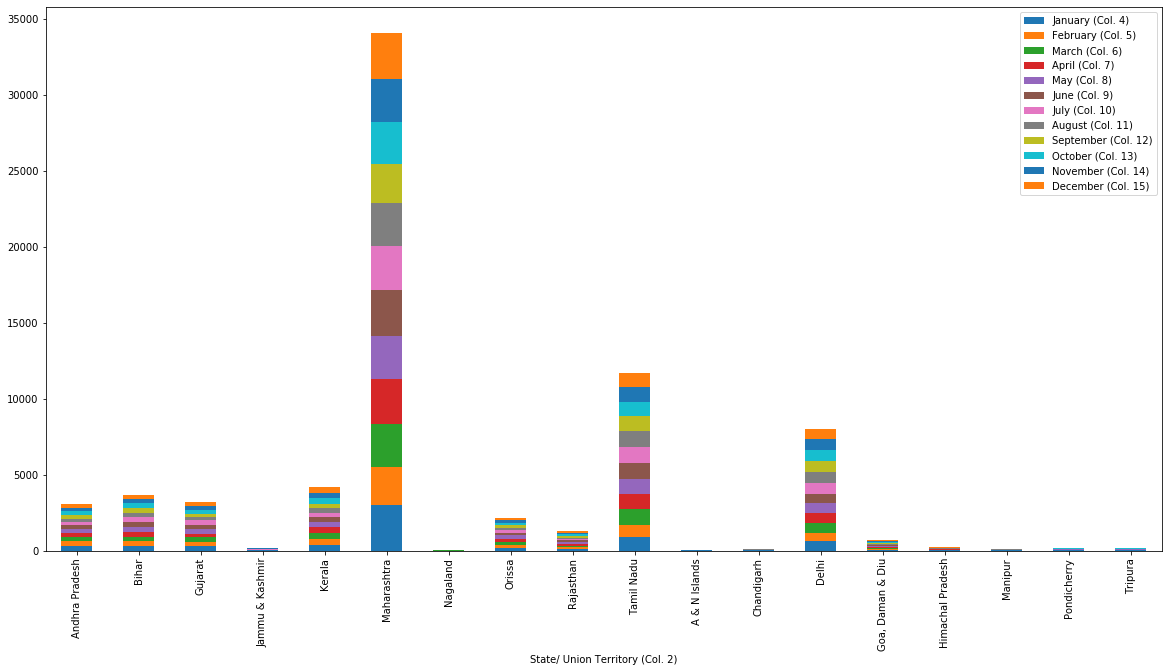

<Figure size 432x288 with 0 Axes>

In [3]:
df1.plot.bar(stacked=True,figsize=(20,10))
plt.show()
plt.savefig('7.1.jpg')

In [4]:
# K-Means clustering starts:
#calculating sum of accidents in each month and storing it
x=[]
x.append(df['January (Col. 4)'].iloc[0:len(df)].sum())
x.append(df['February (Col. 5)'].iloc[0:len(df)].sum())
x.append(df['March (Col. 6)'].iloc[0:len(df)].sum())
x.append(df['April (Col. 7)'].iloc[0:len(df)].sum())
x.append(df['May (Col. 8)'].iloc[0:len(df)].sum())
x.append(df['June (Col. 9)'].iloc[0:len(df)].sum())
x.append(df['July (Col. 10)'].iloc[0:len(df)].sum())
x.append(df['August (Col. 11)'].iloc[0:len(df)].sum())
x.append(df['September (Col. 12)'].iloc[0:len(df)].sum())
x.append(df['October (Col. 13)'].iloc[0:len(df)].sum())
x.append(df['November (Col. 14)'].iloc[0:len(df)].sum())
x.append(df['December (Col. 15)'].iloc[0:len(df)].sum())
x

[6274,
 5443.0,
 6260,
 6231.0,
 6362,
 6319,
 6132.0,
 5929.0,
 5711.0,
 5969,
 6083.0,
 6258]

In [5]:
#storing indices for making combinations
ind=[]
for i in range(0,len(x)):
    ind.append(i)

In [6]:
#calculating minimum sse for each number of clusters
elb=[]
numclus=[]
for numofclus in range(1,12):
    comb=sum([list(map(list, combinations(ind, i))) for i in range(numofclus,numofclus+1)], [])
    minsse=1000000000000
    for j in range(1,len(comb)):
        cenx=[]
        for k in range(0,len(comb[j])):
            cenx.append(x[comb[j][k]])
        totsse=0
        for k in range(0,len(x)):
            mindis=1000000000000
            for l in range(0,len(cenx)):
                dis=(x[k]-cenx[l])*(x[k]-cenx[l])
                if dis<mindis:
                    mindis=dis
            totsse = totsse + mindis
        if totsse<minsse:
            minsse=totsse
    elb.append(minsse)
    numclus.append(numofclus)
elb

[840973.0,
 245941.0,
 104150.0,
 45906.0,
 16071.0,
 6839.0,
 4438.0,
 2589.0,
 989.0,
 200.0,
 4.0]

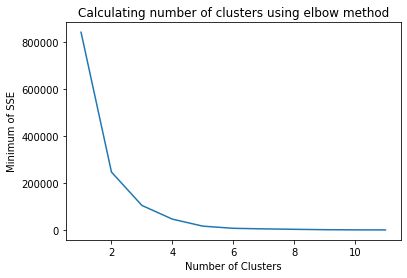

In [7]:
#plotting it in order to calculate the optimum number of clusters via elbow method

plt.plot(numclus, elb) 
  
# naming the x axis 
plt.xlabel('Number of Clusters') 
# naming the y axis 
plt.ylabel('Minimum of SSE') 
  
# giving a title to my graph 
plt.title('Calculating number of clusters using elbow method') 
  
# function to show the plot 
plt.show()

In [8]:
#calculating the clusters with minimum sse for given number of clusters
minnsse=10000000000000
color1=[]
color2=[]
for i in range(0,len(x)):
    color1.append(-1)
    color2.append(-1)
#generating all possible combinations
comb1=sum([list(map(list, combinations(ind, i))) for i in range(4,5)], [])
for rep in range(0,len(comb1)):
    cenx=[]
    #appending corresponding points to indices
    for i in range(0,len(comb1[rep])):
        cenx.append(x[comb1[rep][i]])
    #performing k-means clustering
    for i in range(0,100):
        sse=0
        for j in range(0,len(x)):
            minn=10000000000000
            minin=-1
            for k in range(0,4):
                if((x[j]-cenx[k])*(x[j]-cenx[k])<minn):
                    minn=(x[j]-cenx[k])*(x[j]-cenx[k])
                    minin=k
            color2[j]=minin
            sse=sse+minn
        if(sse<minnsse):
            minnsse=sse
            for j in range(0,len(x)):
                #updating the color in case sse is less
                color1[j]=color2[j]
        for j in range(0,4):
            #calculating new centroids for each cluster
            newx=0
            xno=0
            for k in range(0,len(x)):
                if(color2[k]==j):
                    newx=newx+x[k]
                    xno=xno+1
            cenx[j]=newx/xno
color1

[0, 1, 0, 0, 0, 0, 2, 2, 3, 2, 2, 0]

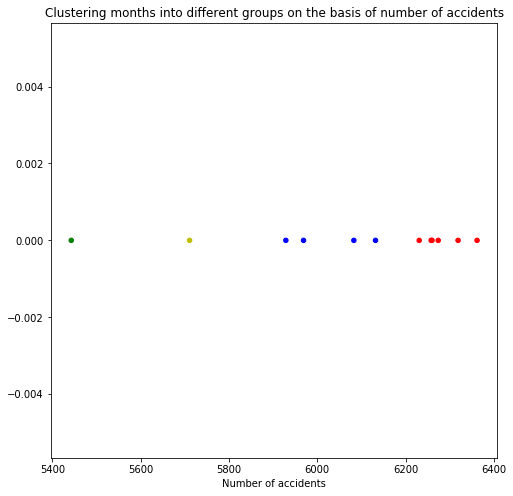

In [9]:
#poltting the obtained clusters on graph
y=[]
for i in range(0,len(x)):
    y.append(0)
a=np.array([x,y])
categories=np.array(color1)
colormap=np.array(['r','g','b','y'])
plt.rcParams["figure.figsize"] = (8, 8)
plt.scatter(a[0], a[1], s=20, c=colormap[categories])
plt.xlabel('Number of accidents')
plt.title('Clustering months into different groups on the basis of number of accidents')
plt.savefig('ScatterClassPlot.png')
plt.show()